In [1]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tree.base import DecisionTree
from metrics import *
from sklearn.datasets import make_classification

c:\Users\vinny\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Function for calculating the k fold cross validation score
def k_fold_cross_val(X,y,k,depth,criterion='gini_index'):
    accuracies = []

    fold_size = len(y)//k
    for num_fold in range(k):
        start_idx = num_fold * fold_size
        end_idx = (num_fold+1) * fold_size

        x_test = X[start_idx:end_idx]
        y_test = y[start_idx:end_idx]

        x_train = np.concatenate((X[:start_idx],X[end_idx:]))
        y_train = np.concatenate((y[:start_idx],y[end_idx:]))

        model = DecisionTree(criterion=criterion,max_depth=depth)
        model.fit(x_train,y_train)
        predictions = model.predict(x_test)

        accuracies.append(accuracy(predictions,y_test))
    return np.mean(accuracies),np.std(accuracies)

In [4]:
# finding the best tree depth function

def best_decision_tree_depth(X,y):
    accuracies,stds = [],[]
    best_depth = None
    best_acc = float('-inf')
    patience = 3
    depth = 1

    while(patience):
        acc,std = k_fold_cross_val(X,y,5,depth)
        accuracies.append(acc)
        stds.append(std)

        if acc > best_acc:
            best_acc = acc
            best_depth = depth

            patience = 3
        else:
            patience -=1
        depth +=1

    return best_depth , accuracies , stds

In [5]:
def make_dataset():
    X, y = make_classification(
        n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=2, class_sep=0.5)
    return X,y

In [30]:
def plot_data(y):
    plt.figure(figsize=(15,8))
    plt.title('Scatter plot for data',fontweight='bold',fontsize=16)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.show()

In [68]:
def plot_acc_std(accuracies,stds):
    
    plt.figure(figsize=(17,7))
    plt.subplot(1,2,1)
    plt.grid(True)
    plt.title('ACCURACY vs DEPTH')
    plt.xlabel('Depth')
    plt.ylabel('Accuracy')
    x_values = list(range(1, len(accuracies) + 1))
    plt.plot(x_values,accuracies,label='Accuracy',color='blue')

    plt.subplot(1,2,2)
    plt.grid(True)
    plt.title('Standard Deviation vs DEPTH')
    plt.xlabel('Depth')
    plt.ylabel('Standard Deviation')
    x_values = list(range(1, len(stds) + 1))
    plt.plot(x_values,stds,label='Standard Deviation',color='red')


    plt.tight_layout()
    plt.show()

In [62]:
def tree_performance(X,y):
    idx = int(np.ceil(0.7*len(y)))
    X_train , X_test = X[:idx+1] , X[idx+1:]
    y_train , y_test = y[:idx+1] , y[idx+1:]

    for criteria in ['information_gain','gini_index']:
        tree = DecisionTree(criterion=criteria)
        tree.fit(X_train,y_train)
        y_hat = tree.predict(X_test)

        print("Criteria :", criteria)
        print(f"Accuracy: {accuracy(y_hat, y_test):.2f}")
        for cls in np.unique(y):
            print(f'Class {cls} - Precision: {precision(y_hat,y_test,cls):.2f}, Recall: {recall(y_hat,y_test,cls):.2f}')
        print()

Lets see how the data looks like

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


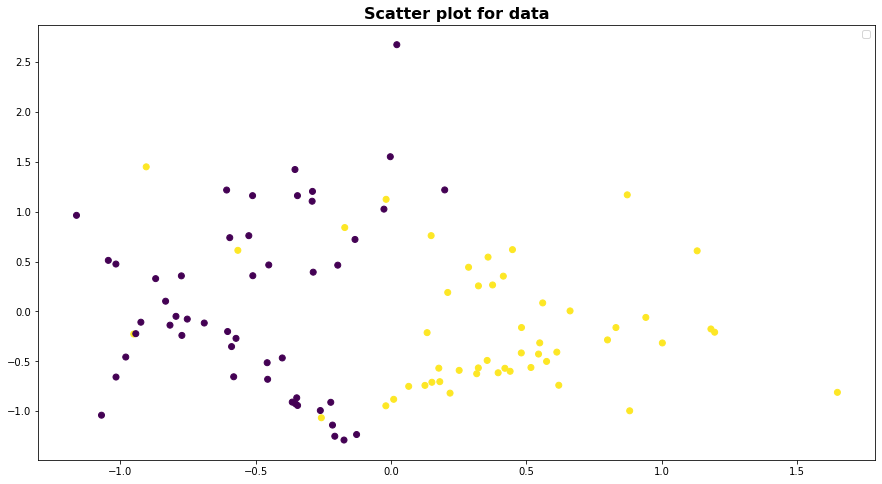

In [63]:
np.random.seed(42)

X,y = make_dataset()
plot_data(y)

So there are 2 clussters , looks easy, lets see how our model performs

##### Q2 (a)  Show the usage of your decision tree on the above dataset. The first 70% of the data should be used for training purposes and the remaining 30% for test purposes. Show the accuracy, per-class precision and recall of the decision tree you implemented on the test dataset.

Let us try to run our tree on the random dataset to see the results

In [64]:
tree_performance(X,y)

Criteria : information_gain
Accuracy: 0.86
Class 0 - Precision: 0.89, Recall: 0.73
Class 1 - Precision: 0.85, Recall: 0.94

Criteria : gini_index
Accuracy: 0.86
Class 0 - Precision: 0.89, Recall: 0.73
Class 1 - Precision: 0.85, Recall: 0.94



#### (b) Use 5 fold cross-validation on the dataset. Using nested cross-validation find the optimum depth of the tree.

LET US NOW SEE THE BEST DEPTH FOR OUR TREE USING 5-FOLD CROSS VALIDATION

DECIDING THE BEST DEPTH OF DECISION TREE


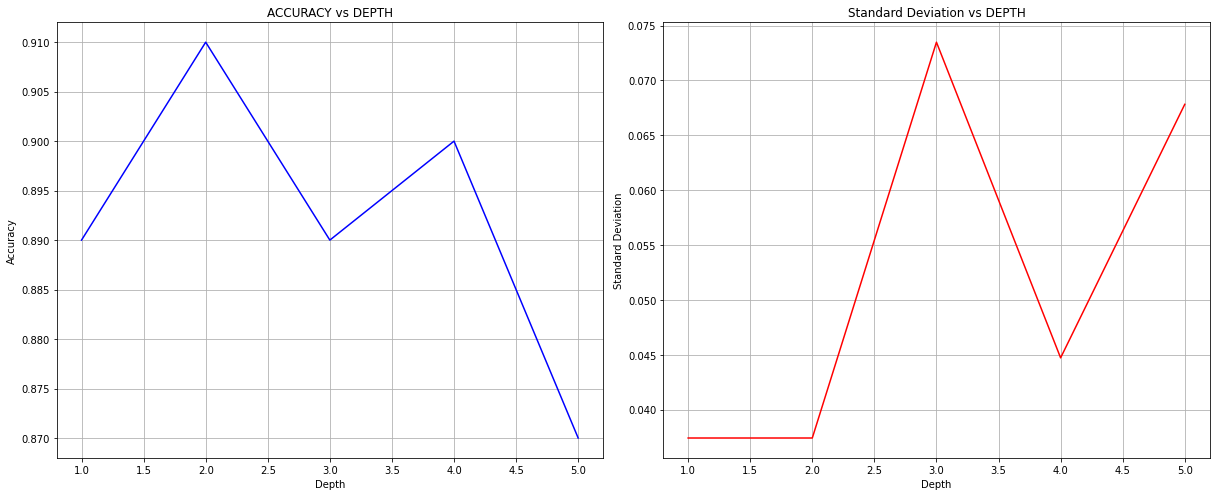

Best Tree Depth = 2


In [69]:
print('DECIDING THE BEST DEPTH OF DECISION TREE')

best_depth , accuracies , stds = best_decision_tree_depth(X,y)
plot_acc_std(accuracies,stds)

print(f'Best Tree Depth = {best_depth}')

We can clearly see that at depth 2, the accuracy is maximum where as the standard deviation is minimum, so depth 2 is the most optimal depth for the dataset given.